# Entrada/salida de arrays NumPy

NumPy tiene una categoría de funciones para grabar y recuperar arrays de disco: <https://docs.scipy.org/doc/numpy/reference/routines.io.html>

In [3]:
import numpy as np

N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)
b

array([ 1.68153653,  1.09700201,  1.70477127, -0.28278751, -0.06812643,
       -1.14264716,  0.14950312,  0.14272231,  0.03263979,  0.71458445])

1.Guardar los arrays anteriores en formato específico de NumPy comprimido y formato de texto (sin comprimir).

In [4]:
path="/home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/"
np.save(path+"arraya.npy",a)
np.save(path+"arrayb.npy",b)

2.Comparar las diferencias de espacio en disco desde el mismo Notebook, y ver sus contenidos con el comando head del sistema operativo.

In [5]:
!du -bsh -b /home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arraya.npy
!du -bsh -b /home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arrayb.npy

!head /home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arraya.npy
!head /home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arrayb.npy

160	/home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arraya.npy
160	/home/oscar/MASTER_BIG_DATA/4_ENTORNOS_DATA_SCIENCE_python/Ejercicio_Bloque1/arrayb.npy
�NUMPY F {'descr': '<f8', 'fortran_order': False, 'shape': (10,), }           
��o���?ޭc����?S]�"���?�q\ ��?]U_Y��?0�+˟�?�����?<�;����?��;�Ɩ�?P)�Y��?�NUMPY F {'descr': '<f8', 'fortran_order': False, 'shape': (10,), }           
1�ڒ��?�dj�Q��?ͦ�=�F�?XI�0ҿw2iʻp��qe�cHH�m��
�"�?<�7��D�?B�5�)��?��4���?

3.Cargarlos de nuevo en memoria con nombres de variable diferentes.

In [6]:
c=np.load(path+"arraya.npy")
d=np.load(path+"arrayb.npy")
print c
print d

[ 0.87414476  0.55868135  0.65072972  0.04209138  0.51737644  0.05981288
  0.70484725  0.26274724  0.54965532  0.07856228]
[ 1.68153653  1.09700201  1.70477127 -0.28278751 -0.06812643 -1.14264716
  0.14950312  0.14272231  0.03263979  0.71458445]


4.(opcional) Guardar los dos arrays en un solo fichero de texto y recuperarlos de nuevo. Pista:
utilizar tuplas.

In [7]:
tupla_arrays=(a,b)
np.save(path+"2in1.npy",tupla_arrays)
tup_read=np.load(path+"2in1.npy")
print tup_read[0]
print tup_read[1]

[ 0.87414476  0.55868135  0.65072972  0.04209138  0.51737644  0.05981288
  0.70484725  0.26274724  0.54965532  0.07856228]
[ 1.68153653  1.09700201  1.70477127 -0.28278751 -0.06812643 -1.14264716
  0.14950312  0.14272231  0.03263979  0.71458445]


# Generación de datos - distribuciones de SciPy

SciPy tiene un buen número de distribuciones de probabilidad conocidas implementadas, continuas y
discretas: <https://docs.scipy.org/doc/scipy/reference/stats.html>
Por ejemplo, podemos trabajar con distribuciones normales de la siguiente forma.

(array(5.0), array(1.0))


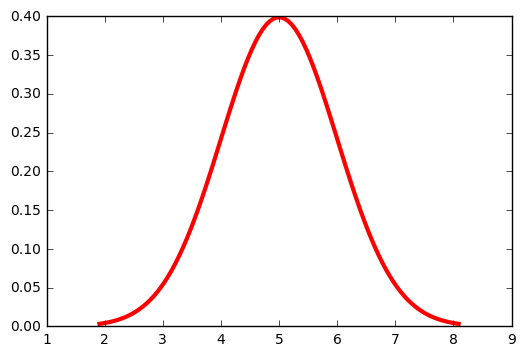

In [8]:
from scipy.stats import norm
# Creamos una distribució normal con media 5.
mi_normal = norm(5)
# Obtenemos los percentiles de los extremos de la distribución:
x= np.linspace(mi_normal.ppf(0.001), mi_normal.ppf(0.999), 100)
#Obtenemos los estadísticos comunes:
m,v= mi_normal.stats(moments='mv')
print(m,v)
# Dibujamos la función
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(x, mi_normal.pdf(x), 'r-', lw=3)

Podemos generar a su vez datos aleatorios para simular una muestra de la siguiente manera.

(array([ 0.00372154,  0.        ,  0.        ,  0.00372154,  0.        ,
         0.01860771,  0.04093696,  0.06326621,  0.09676009,  0.13397551,
         0.17863401,  0.26050794,  0.27911565,  0.3461034 ,  0.45402812,
         0.37215419,  0.35726803,  0.33866032,  0.28283719,  0.17119093,
         0.12281088,  0.08559546,  0.05582313,  0.01860771,  0.02232925,
         0.00744308,  0.00372154,  0.00372154]),
 array([ 0.92880683,  1.19751266,  1.46621849,  1.73492431,  2.00363014,
         2.27233596,  2.54104179,  2.80974761,  3.07845344,  3.34715927,
         3.61586509,  3.88457092,  4.15327674,  4.42198257,  4.69068839,
         4.95939422,  5.22810005,  5.49680587,  5.7655117 ,  6.03421752,
         6.30292335,  6.57162918,  6.840335  ,  7.10904083,  7.37774665,
         7.64645248,  7.9151583 ,  8.18386413,  8.45256996]),
 <a list of 28 Patch objects>)

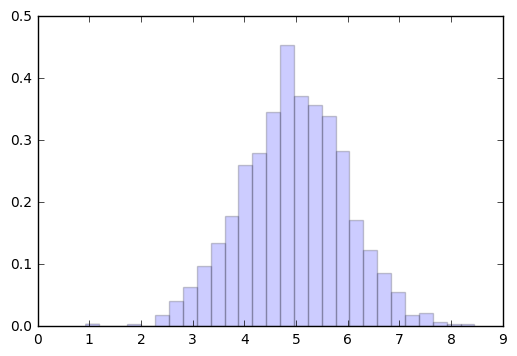

In [9]:
r = mi_normal.rvs(size=1000)
plt.hist(r, normed=True, alpha=0.2, bins="auto")

Queremos ahora estudiar la distribución de Pareto. Podemos ver su forma en Wikipedia: <https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto>

Se pide lo siguiente:
- Representar las funciones de densidad y de probabilidad similares a las de Wikipedia.

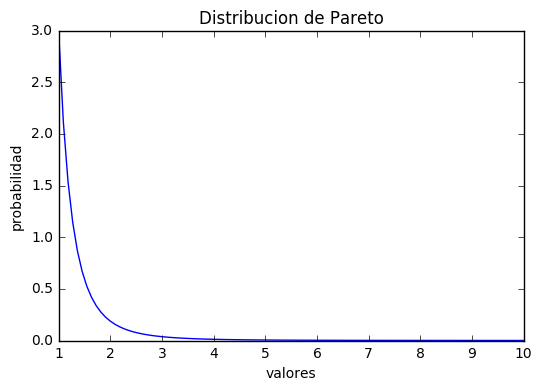

In [10]:
from scipy.stats import pareto
import matplotlib.pyplot as plt
import numpy as np

# Parametro de forma.
k = 3 
# Distribució de pareto con parametro de forma k.
mi_pareto = pareto(k)
# Percentiles de los extremos de la distribución:
xpar= np.linspace(mi_pareto.ppf(0.001), mi_pareto.ppf(0.999), 100)
# Funcion de probabilidad
fp=mi_pareto.pdf(xpar)
# Dibujamos la función
%matplotlib inline

plt.plot(xpar, fp)
plt.title("Distribucion de Pareto")
plt.ylabel("probabilidad")
plt.xlabel("valores")

Hallar el percentil del 80% con k=1. Razonar sobre el Principio de Pareto, se puede consultar
aquí: <https://en.wikipedia.org/wiki/Pareto_principle>

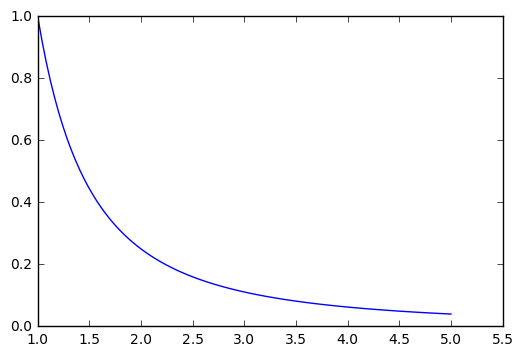

In [11]:
# Parametro de forma.
k = 1
# Distribució de pareto con parametro de forma k.
mi_pareto = pareto(k)
print mi_pareto
# Hallar el percentil del 80%
xpar= np.linspace(mi_pareto.ppf(0.001), mi_pareto.ppf(0.8), 100)
#print xpar
# Funcion de probabilidad
fp=mi_pareto.pdf(xpar)
# Dibujo de la función
%matplotlib inline
plt.plot(xpar, fp)

#TODO - No entiendo la instruccion "Razonar sobre el Principio de Pareto"

# Generación de datos - otras distribuciones

Si no encontrásemos la distribución en las bibliotecas de ScyPy pero la conocemos ("sabemos la
fórmula"), siempre podemos generar los datos aleatorios generando un array con los datos en el rango
en que está definida, y después tomando aleaoriamente un número de elementos de allí ("con
reemplazo").
Vamos a pensar si tenemos esta función: $f(t)$ definida por: $$f(t)=\begin{cases} 0, & t<0, \ \frac{2t}
{(1+t^2)^2}, & t \ge 0 \end{cases}$$
Se pide:
- Dibujar la función en el rango [0, 10].
- Generar una muestra aleatoria de la misma.
- Dibujar esa muestra y su histograma.

[0.0, 0.5, 0.16, 0.06, 0.02768166089965398, 0.014792899408284023, 0.008765522279035792, 0.0056, 0.00378698224852071, 0.002676977989292088]


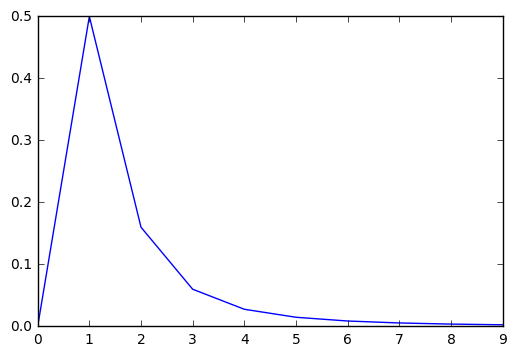

In [12]:
###-------Dibujar la función en el rango [0, 10].-------##

# Distribucion de f(t) para t.
def funcb(t):
    num=0.0
    if(t>=0.0):
        num= (2.0*t)/((1.0+t**2.0)**2.0)
    return num
def funca(ini,fin):
    res=[]
    for t in range(ini,fin):
        res.append(funcb(t))
    return res

# Parametro de funcion, rango
ini=0
fin=10
mi_dis = funca(ini,fin)
print mi_dis
# Dibujo de la función
%matplotlib inline
plt.plot(mi_dis)

- Generar una muestra aleatoria de la misma.

In [13]:
###-------Generar una muestra aleatoria de la misma-------##
## 20 valores entre 0 y 30
random_sample=[]
for randn in np.random.randint(0,30,20):
    random_sample.append(funcb(randn))
print sorted(random_sample)


[8.1809513600126379e-05, 8.1809513600126379e-05, 0.00012759138094703426, 0.00012759138094703426, 0.00012759138094703426, 0.00014417488413445511, 0.00018705494739079605, 0.00040428061831153389, 0.00040428061831153389, 0.00040428061831153389, 0.00048448878862662569, 0.00048448878862662569, 0.00058736001253034697, 0.0011414982164090369, 0.0019605920988138418, 0.00378698224852071, 0.00378698224852071, 0.00378698224852071, 0.014792899408284023, 0.02768166089965398]


- Dibujar esa muestra y su histograma.

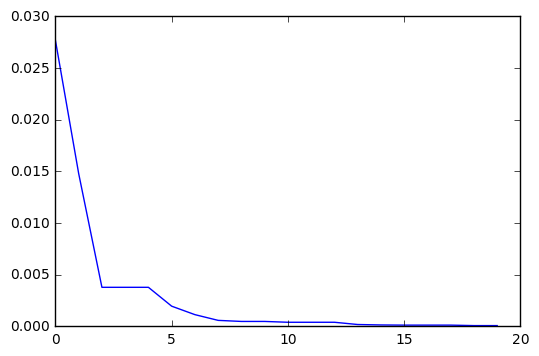

In [14]:
# Dibujo de la muestra
%matplotlib inline
plt.plot(sorted(random_sample,reverse=True))

(array([ 13.,   1.,   0.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.18095136e-05,   6.33806541e-04,   1.18580357e-03,
          1.73780060e-03,   2.28979762e-03,   2.84179465e-03,
          3.39379168e-03,   3.94578871e-03,   4.49778574e-03,
          5.04978276e-03,   5.60177979e-03,   6.15377682e-03,
          6.70577385e-03,   7.25777087e-03,   7.80976790e-03,
          8.36176493e-03,   8.91376196e-03,   9.46575898e-03,
          1.00177560e-02,   1.05697530e-02,   1.11217501e-02,
          1.16737471e-02,   1.22257441e-02,   1.27777412e-02,
          1.33297382e-02,   1.38817352e-02,   1.44337322e-02,
          1.49857293e-02,   1.55377263e-02,   1.60897233e-02,
          1.66417203e-02,   1.71937174

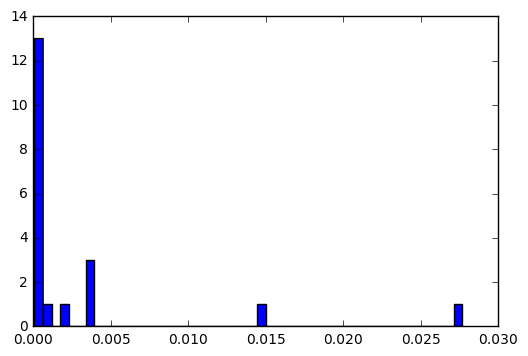

In [15]:
plt.hist(sorted(random_sample), bins=50)

# Generación de datos censurados

En las técnicas de análisis estadístico conocidas como "análisis de supervivencia" se considera el
tiempo hasta un evento. Por ejemplo, en enfermos de cáncer, sería el tiempo hasta el fallecimiento o al final del estudio.

Si alguno de los enfermos en estudio antes de fallecer abandona el estudio (por ejemplo, emigra a otro
país) decimos que el dato está "censurado" porque tenemos la fecha en la que se fue, que es
lógicamente inferior a la fecha desconocida de su fallecimiento. También son datos "censurados" los
tiempos de los pacientes que al terminar el estudio aún siguen vivos.

Generar datos censurados sintéticos requiere por tanto dos pasos:
- Generar aleatorios con la distribución(-es) de los tiempos de fallecimiento.
- Decidir el tiempo en que termina el estudio y ajustar los tiempos a ese máximo.

Por otro lado, en la mayoría de los estudios se tiene dos grupos que se comparan. Vamos a simular dos
grupos de pacientes con diferente distribución e influir datos censurados.
Se pide generar unos datos simulados de dos poblacioens de pacientes:
- Cuyo tiempo de supervivencia sigue una distribución exponencial en ambos casos, pero con
parámetros diferentes (por ejemplo, 12 y 2). Pista: Crear dos arrays de aleatorios, o un array con
tuplas.
- En la que se mezclan aleatoriamente un número de unos u otros. Pista: utilizar la distribución
uniform() e indexar una u otra de las series.
- En la que finalmente, el estudio termina en el tiempo $t=10$.

[9.4832179938908343, 9.234940228354299, 9.4319941745035312, 9.9805145495768617, 9.9106812024278437, 9.9721299333979623, 9.4445930295680522, 9.7503069676237732, 9.5479887012214739, 9.8730571171894272, 9.2205758165009328, 7.2514743175128142, 7.1157562155019782, 7.0189341255844617, 7.2240859828864199, 8.3078443357346874, 6.1177453983582843, 6.3990606385454161, 6.7021110034238447, 7.1902674338128438, 6.3605678897119819, 6.0186130646738754, 6.0462032650015596, 6.0084762865777854, 8.3632522789156205, 6.3917027095032237, 6.3015404983832433, 6.8804995458804239, 6.1462251605742306, 8.1578683466206314]
30


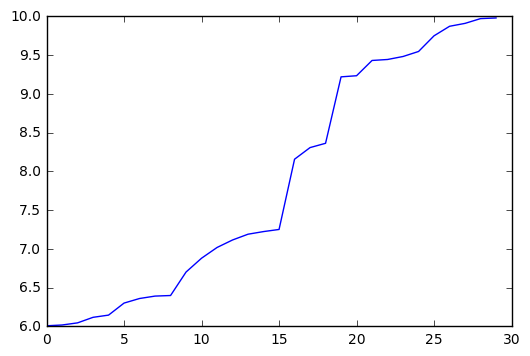

In [199]:
from scipy.stats import expon

t=10
#Generar aleatorios con la distribución(-es) de los tiempos de fallecimiento.
ar1 = expon.rvs(9,size=20)
ar2 = expon.rvs(6,size=20)
censored=[]
for val in np.concatenate((ar1,ar2),axis=0):
    if(val<=t):
        censored.append(val)
print censored
print len(censored)
plt.plot(sorted(censored))
        
